# Results
## Creating Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_dataset(csv_name:str):
    data= pd.read_csv(csv_name,sep='\t')
    data["Start Time"]=pd.to_datetime(data["Start Time"])
    data["End Time"]=pd.to_datetime(data["End Time"])
    return data

def load_profile(profile_name:str):
    data= pd.read_csv(profile_name)
    data["Time"]=pd.to_datetime(data["Time"])
    return data


class AlgorithmData:
    def __init__(self,name,csv_name,profile_name):
        self.name=name
        self.dataset=load_dataset(csv_name)
        self.profile=load_profile(profile_name)


aws_parallel=AlgorithmData(name="AWS-Parallel",csv_name="aws/aws-parallel.tsv",profile_name="aws/aws-parallel.profile")
aws_sequential=AlgorithmData("AWS-Sequential",csv_name="aws/aws-sequential.tsv",profile_name="aws/aws-sequential.profile")
legion5_parallel=AlgorithmData("Legion5-Parallel",csv_name="legion5/legion5-parallel.tsv",profile_name="legion5/legion5-parallel.profile")
legion5_sequential=AlgorithmData("Legion5-Sequential",csv_name="legion5/legion5-sequential.tsv",profile_name="legion5/legion5-sequential.profile")

## Visualisation Functions

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 28 23:46:47 2022

@author: ramizouari
"""
sns.set(style="ticks")
sns.set_style("whitegrid")


def visualise_time(profile,start_time, end_time,ax=None,figsize=None):
    if ax is None:
        fig,ax=plt.subplots(figsize=figsize)
    sns.lineplot(data=profile[(profile["Time"]>=start_time)&(profile["Time"] < end_time)],x="Time",y="Current Memory",ax=ax)
    return ax

def visualise_time_relative(profile,start_time, end_time,ax=None,label=None,figsize=None,normalize=False,copies=1):
    if ax is None:
        fig,ax=plt.subplots(figsize=figsize)
    X=profile[(profile["Time"]>=start_time)&(profile["Time"] < end_time)]
    Y=X.copy()
    delta=end_time-start_time
    for i in range(1,copies):
        Z=X.copy()
        Z["Time"]=X["Time"]+i*delta
        Y=pd.concat([Y,Z],ignore_index=True)
    k=copies*(end_time-start_time).total_seconds() if normalize else 1
    sns.lineplot(data=Y,x=(Y["Time"]-start_time).dt.total_seconds()/k,y="Current Memory",label=label,ax=ax)
    return ax


<AxesSubplot:xlabel='Time', ylabel='Current Memory'>

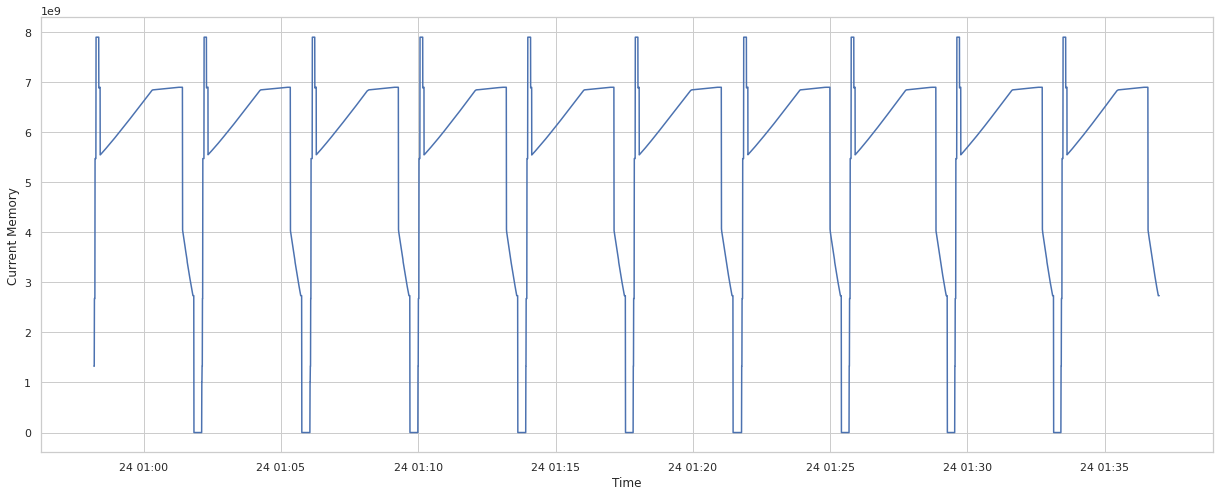

In [3]:
visualise_time(aws_parallel.profile,aws_parallel.dataset.iloc[59]["Start Time"],aws_parallel.dataset.iloc[59]["End Time"],figsize=(21,8))

<AxesSubplot:title={'center':'Comparaison of different algorithms on soc-sinaweibo_260M.edges'}, xlabel='Time', ylabel='Current Memory'>

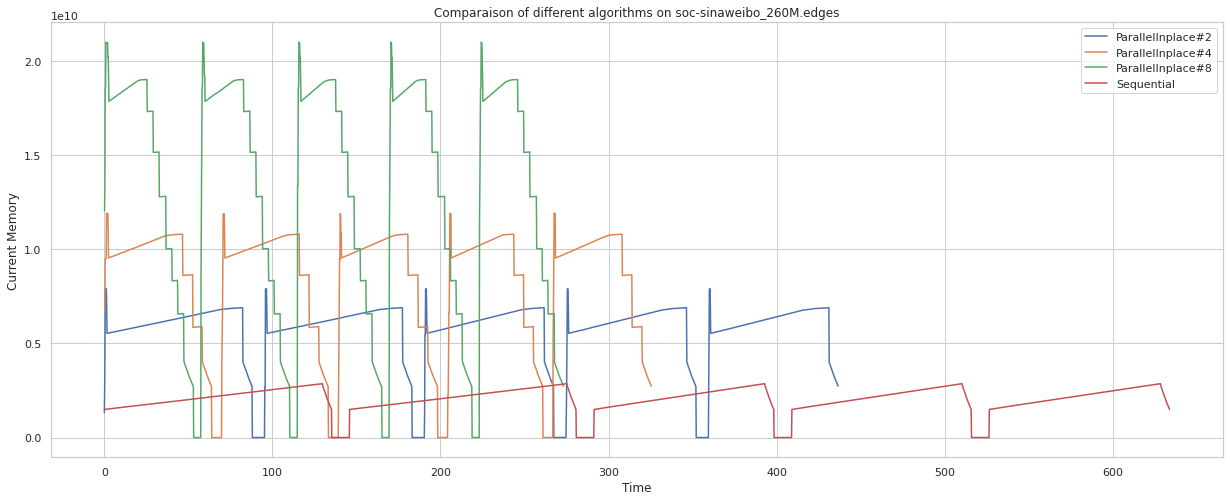

In [35]:
def compare_algorithms(results,graph_name,ax=None):
    for dataset in results:
        for query in dataset.dataset.query(f"`Graph Name`=='{graph_name}'").index:
            visualise_time_relative(dataset.profile,dataset.dataset.iloc[query]["Start Time"],dataset.dataset.iloc[query]["End Time"],ax=ax,label=dataset.dataset.iloc[query]["Type"],normalize=False)
    ax.set_title(f"Comparaison of different algorithms on {graph_name}")
    return ax

fig,ax=plt.subplots(figsize=(21,8))
compare_algorithms([legion5_parallel,legion5_sequential],"soc-sinaweibo_260M.edges",ax=ax)

<AxesSubplot:title={'center':'Comparaison of different algorithms on soc-sinaweibo_260M.edges'}, xlabel='Time', ylabel='Current Memory'>

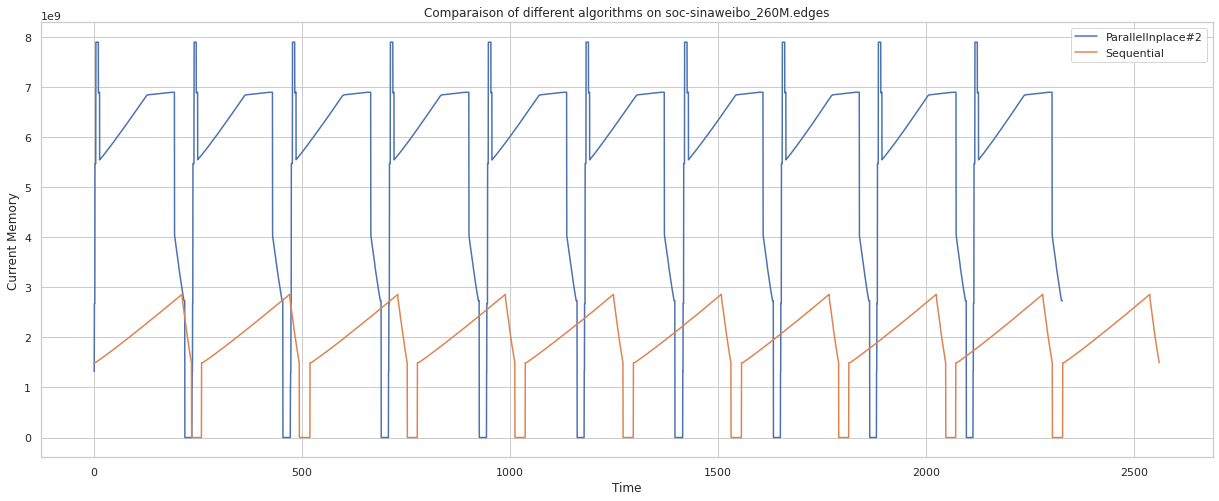

In [36]:
fig,ax=plt.subplots(figsize=(21,8))
compare_algorithms([aws_parallel,aws_sequential],"soc-sinaweibo_260M.edges",ax)

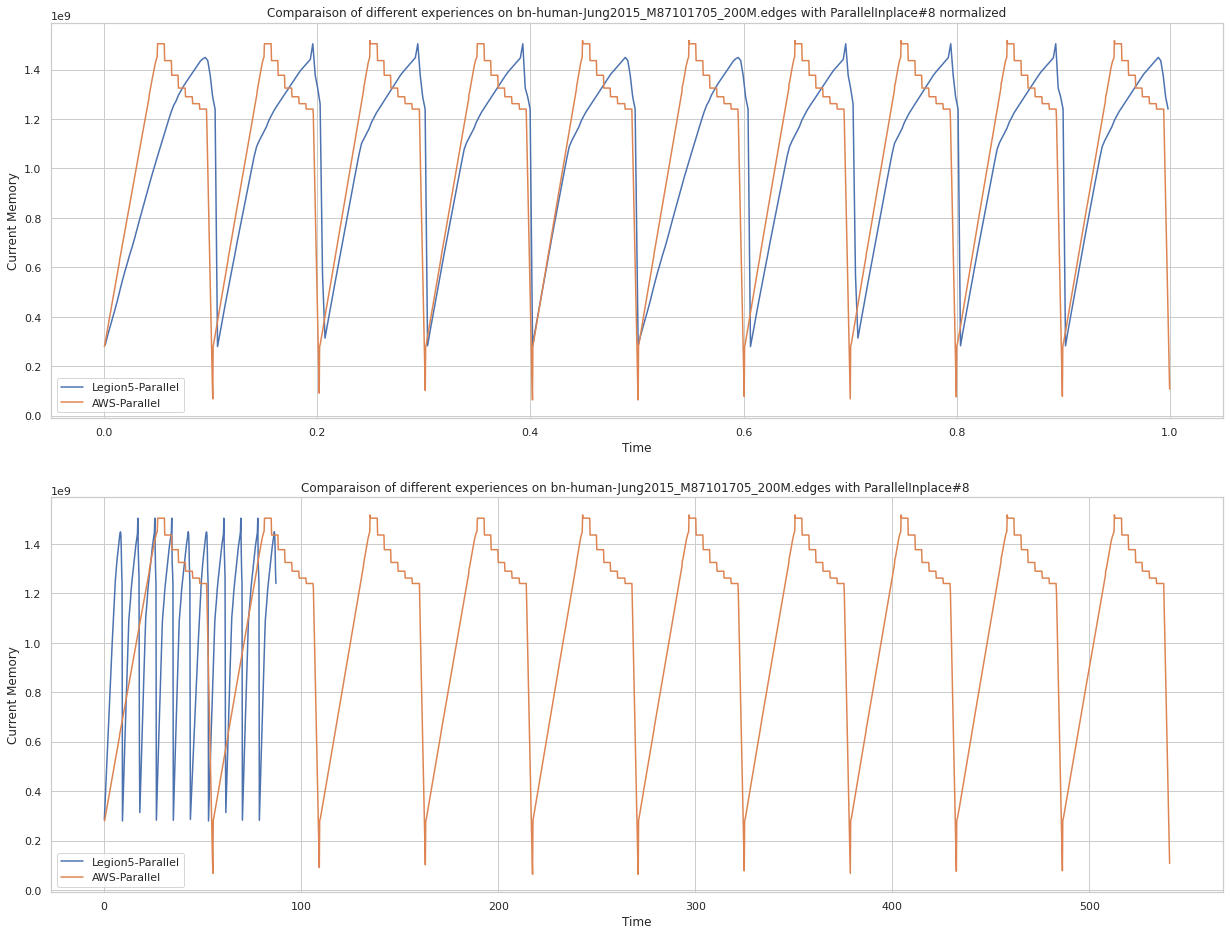

In [11]:
def compare_experiences(results,graph_name,algorithm_type,ax=None,normalize=True,copies=None):
    if copies is None:
        copies=[1]*results
    for result,copy in zip(results,copies):
        for query in result.dataset.query(f"`Graph Name` == '{graph_name}' and `Type` == '{algorithm_type}'").index:
            visualise_time_relative(result.profile,result.dataset.iloc[query]["Start Time"],result.dataset.iloc[query]["End Time"],ax=ax,label=result.name,normalize=normalize,copies=copy)
    ax.set_title(f"Comparaison of different experiences on {graph_name} with {algorithm_type} {'normalized' if normalize else '' }")
    return ax

fig,ax=plt.subplots(2,1,figsize=(21,16))
compare_experiences([legion5_parallel,aws_parallel,legion5_sequential,aws_sequential],"bn-human-Jung2015_M87101705_200M.edges","ParallelInplace#8",ax=ax[0],normalize=True,copies=[2,1,2,1]);
compare_experiences([legion5_parallel,aws_parallel,legion5_sequential,aws_sequential],"bn-human-Jung2015_M87101705_200M.edges","ParallelInplace#8",ax=ax[1],normalize=False,copies=[2,1,2,1]);

0.1353350125731979